### FDS CW3

To run this code, it is best to always start running from the top. This is to ensure the dataframe being processed stays as intended by the author (s2141524).

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# read the csv file
df = pd.read_csv('IMDB-Movie-Data.csv')

In [370]:
df = df.dropna()
# df.shape

<Axes: >

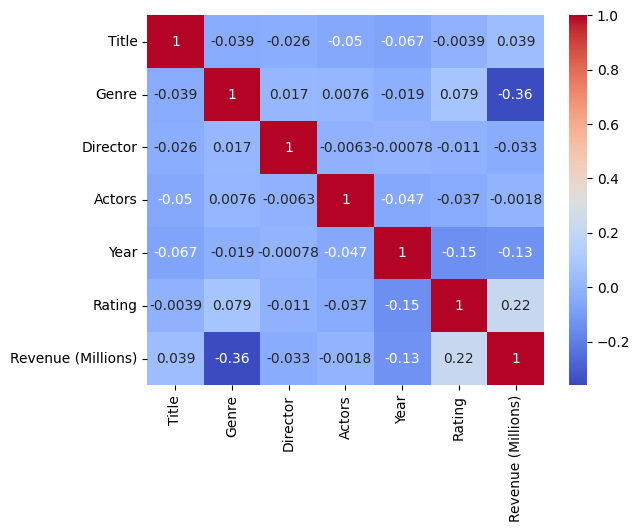

In [371]:
df5 = pd.read_csv('IMDB-Movie-Data.csv')

df5 = df5.dropna()
label_encoder = preprocessing.LabelEncoder()


df5['Genre']= label_encoder.fit_transform(df5['Genre'])
df5['Director']= label_encoder.fit_transform(df5['Director'])
df5['Title']= label_encoder.fit_transform(df5['Title'])
df5['Actors']= label_encoder.fit_transform(df5['Actors'])
df5.drop('Description', axis=1, inplace=True)
df5.drop('Votes', axis=1, inplace=True)
df5.drop('Rank', axis=1, inplace=True)
df5.drop('Runtime (Minutes)', axis=1, inplace=True)
df5 = df5.drop('Metascore', axis=1)

corr_matrix = df5.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')



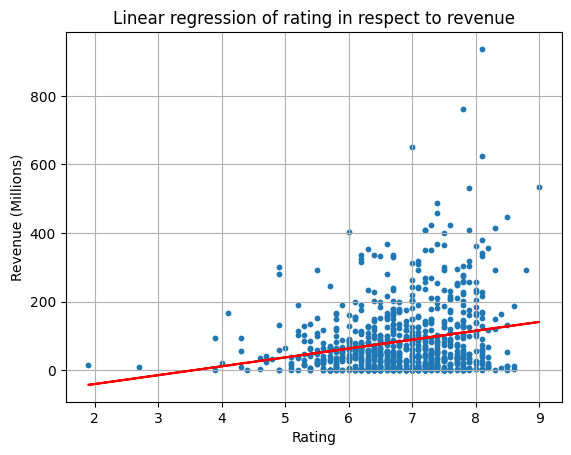

Slope coefficient: 25.852287759248938
Intercept coefficient: -91.60119811505385
R-squared: 0.04713491801764158
Correlation coefficient: 0.21710577610381881


In [354]:
X = df['Rating']
Y = df['Revenue (Millions)']

reg = LinearRegression()

reg.fit(X.values.reshape(-1, 1), Y)
y_pred = reg.predict(X.values.reshape(-1,1))

plt.scatter(X, Y, s=10)
plt.title("Linear regression of rating in respect to revenue")
plt.plot(X, y_pred, color='red')
plt.ylabel('Revenue (Millions)')
plt.xlabel('Rating')
plt.grid()
plt.show()

print('Slope coefficient:', reg.coef_[0])
print('Intercept coefficient:', reg.intercept_)

r_squared = reg.score(X.values.reshape(-1,1), Y)
print('R-squared:', r_squared)

corrCoefficient = df['Revenue (Millions)'].corr(df['Rating'])
print('Correlation coefficient:', corrCoefficient)


In [355]:
# from collections import Counter

# actors = []

# # Finding the top 20 actors with the most movie in the dataset
# for i in df['Actors']:
#     split_actors = i.split(", ")
#     for actor in split_actors:
#         actors.append(actor)
        
# counted_list = Counter(actors)
# for actor, count in counted_list.most_common(20):
#     print(f"{actor}: {count}")
    

In [356]:
df2 = pd.read_csv('IMDB-Movie-Data.csv')
df2 = df2.dropna()

In [357]:


label_encoder = preprocessing.LabelEncoder()


df2['Genre']= label_encoder.fit_transform(df2['Genre'])
df2['Director']= label_encoder.fit_transform(df2['Director'])
df2['Title']= label_encoder.fit_transform(df2['Title'])
df2['Actors']= label_encoder.fit_transform(df2['Actors'])
df2.drop('Description', axis=1, inplace=True)
df2.drop('Votes', axis=1, inplace=True)
df2.drop('Rank', axis=1, inplace=True)
df2.drop('Runtime (Minutes)', axis=1, inplace=True)




In [358]:
from sklearn.ensemble import RandomForestRegressor

X = df2.drop('Revenue (Millions)', axis=1)
y = df2['Revenue (Millions)']

# Fit a random forest classifier
rfc = RandomForestRegressor(n_estimators=50, random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

Title: 0.0966282738331542
Genre: 0.3472759799331931
Director: 0.10517781515194148
Actors: 0.09407317439624674
Year: 0.06901139800926465
Rating: 0.18035075238241507
Metascore: 0.10748260629378482


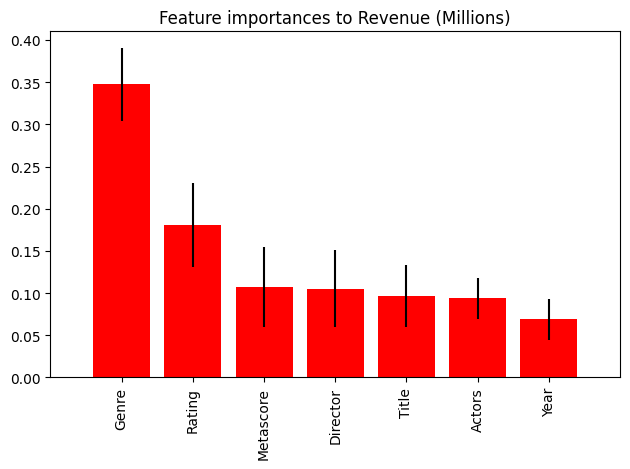

In [359]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances to Revenue (Millions)")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [360]:

df2 = df2.drop('Revenue (Millions)', axis=1)
df2 = df2.drop('Metascore', axis=1)
df2 = df2.drop('Year', axis=1)

X = df2.drop('Rating', axis=1)
y = df2['Rating']

# Fit a random forest classifier
rfc = RandomForestRegressor(n_estimators=50, random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

Title: 0.2390611255673587
Genre: 0.2929756736297567
Director: 0.2163707363838314
Actors: 0.25159246441905325


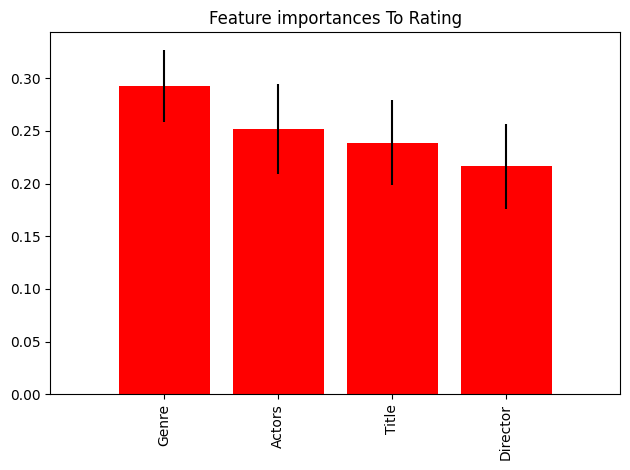

In [361]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances To Rating")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

/var/folders/34/b30m3sjs3973ff4tsbxn66rw0000gn/T/ipykernel_42496/3861119322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_revenue_df['Genre'] = genre_revenue_df['Genre'].str.split(',')
/Users/ahmadrafi/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


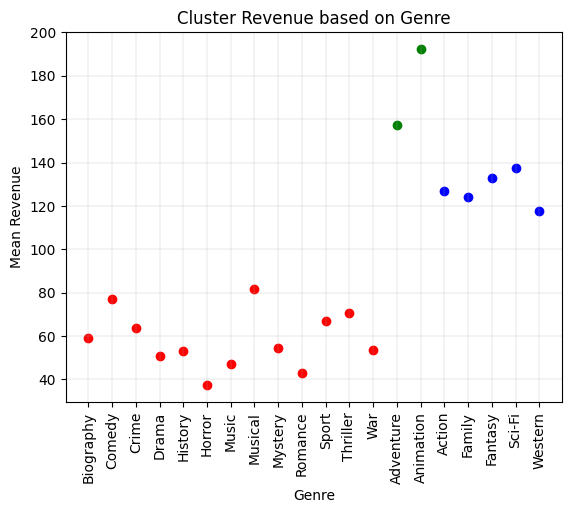

<Figure size 1000x1000 with 0 Axes>

In [362]:
from sklearn.cluster import KMeans

df3 = pd.read_csv('IMDB-Movie-Data.csv')
df3 = df3.dropna()

# Clean the data
genre_revenue_df = df3[['Genre', 'Revenue (Millions)']]
genre_revenue_df['Genre'] = genre_revenue_df['Genre'].str.split(',')


genre_revenue_list = []
for index, row in genre_revenue_df.iterrows():
    for genre in row['Genre']:
        genre_revenue_list.append([genre.strip(), row['Revenue (Millions)']])
        
genre_revenue_clean_df = pd.DataFrame(genre_revenue_list, columns=['Genre', 'Revenue (Millions)'])

genre_mean_revenue = genre_revenue_clean_df.groupby('Genre')['Revenue (Millions)'].mean()
genre_mean_revenue_df = pd.DataFrame(genre_mean_revenue)

X = np.array(genre_mean_revenue_df['Revenue (Millions)'])

X = X.reshape(-1, 1)
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Add the labels to the DataFrame
labels = kmeans.labels_
genre_mean_revenue_df['cluster'] = labels

# Plot the results
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(genre_mean_revenue_df[genre_mean_revenue_df['cluster'] == i].index,
                genre_mean_revenue_df[genre_mean_revenue_df['cluster'] == i]['Revenue (Millions)'], c=colors[i])
plt.title('Cluster Revenue based on Genre')
plt.grid(True, linewidth=0.2, linestyle="-")
plt.xlabel('Genre')
plt.ylabel('Mean Revenue')
plt.xticks(rotation=90)
plt.figure(figsize=(10, 10))
plt.show()


# genre_revenue_df.head()
# genre_revenue_clean_df.info()

/var/folders/34/b30m3sjs3973ff4tsbxn66rw0000gn/T/ipykernel_42496/2524422490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_rating_df['Genre'] = genre_rating_df['Genre'].str.split(',')
/Users/ahmadrafi/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


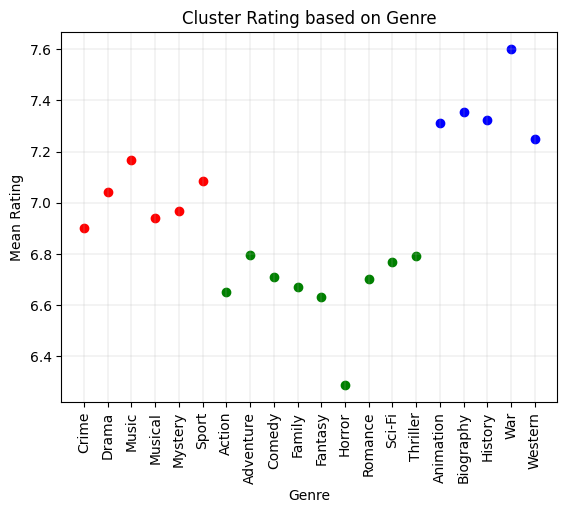

<Figure size 1000x1000 with 0 Axes>

In [363]:
df4 = pd.read_csv('IMDB-Movie-Data.csv')
df4 = df4.dropna()

# Clean the data
genre_rating_df = df4[['Genre', 'Rating']]
genre_rating_df['Genre'] = genre_rating_df['Genre'].str.split(',')


genre_rating_list = []
for index, row in genre_rating_df.iterrows():
    for genre in row['Genre']:
        genre_rating_list.append([genre.strip(), row['Rating']])
        
genre_rating_clean_df = pd.DataFrame(genre_rating_list, columns=['Genre', 'Rating'])

genre_mean_rating = genre_rating_clean_df.groupby('Genre')['Rating'].mean()
genre_mean_rating_df = pd.DataFrame(genre_mean_rating)

X = np.array(genre_mean_rating_df['Rating'])

X = X.reshape(-1, 1)
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Add the labels to the DataFrame
labels = kmeans.labels_
genre_mean_rating_df['cluster'] = labels

# Plot the results
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(genre_mean_rating_df[genre_mean_rating_df['cluster'] == i].index,
                genre_mean_rating_df[genre_mean_rating_df['cluster'] == i]['Rating'], c=colors[i])
plt.title('Cluster Rating based on Genre')
plt.grid(True, linewidth=0.2, linestyle="-")
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.figure(figsize=(10, 10))
plt.show()

In [364]:
df6 = pd.read_csv('IMDB-Movie-Data.csv')

df6["BoxOfficeSuccess"] = (df6["Revenue (Millions)"] > df6["Revenue (Millions)"].median()).astype(int)

# df6.info()

label_encoder = preprocessing.LabelEncoder()

df6['Genre']= label_encoder.fit_transform(df6['Genre'])
df6['Director']= label_encoder.fit_transform(df6['Director'])
df6['Title']= label_encoder.fit_transform(df6['Title'])
df6['Actors']= label_encoder.fit_transform(df6['Actors'])

X = df6[["Genre", 'Director', 'Actors']]
y = df6["BoxOfficeSuccess"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Accuracy:", lr.score(X_test, y_test))


Accuracy: 0.635


In [ ]:
df.shape